<a href="https://colab.research.google.com/github/Meaiie/python_dataviz2024/blob/main/Visualize_Data_Comparison_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Data_viz'

In [ ]:
data = pd.read_csv(os.path.join(path,'barchart_data.csv'))
data.head()

,Unnamed: 0,Year,Quarter,Region,Brand,Price Category,Sales
0,0,2021,Q1,North America,BrandA,Budget,8270
1,1,2021,Q1,North America,BrandA,Mid-range,1860
2,2,2021,Q1,North America,BrandA,Premium,6390
3,3,2021,Q1,North America,BrandB,Budget,6191
4,4,2021,Q1,North America,BrandB,Mid-range,6734


In [ ]:
data['Price Category'] = data['Price Category'].replace({'Budget': 'รุ่นประหยัด', 'Mid-range': 'รุ่นเริ่มต้น', 'Premium': 'รุ่นเรือธง'})
data.head()


,Unnamed: 0,Year,Quarter,Region,Brand,Price Category,Sales
0,0,2021,Q1,North America,BrandA,รุ่นประหยัด,8270
1,1,2021,Q1,North America,BrandA,รุ่นเริ่มต้น,1860
2,2,2021,Q1,North America,BrandA,รุ่นเรือธง,6390
3,3,2021,Q1,North America,BrandB,รุ่นประหยัด,6191
4,4,2021,Q1,North America,BrandB,รุ่นเริ่มต้น,6734


## เตรียมข้อมูล

#### แปลงข้อมูลบอกเวลาให้เป็นตัวแปรชนิด datetime

In [ ]:
data['search_timestamp']  = pd.to_datetime(data['search_timestamp'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

KeyError: 'search_timestamp'

## Bar chart (กราฟแท่ง)
(กราฟผลไม้)

In [ ]:
# prompt: plot barchart เปรียบเทียบปริมาณ Sales ทั้งหมดของแต่ละ Region

import matplotlib.pyplot as plt

# Group data by Region and sum the Sales
region_sales = data.groupby('Region')['Sales'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(region_sales.index, region_sales.values)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()


In [ ]:
region_sales.reset_index()['Region']

In [ ]:
region_sales.reset_index().Region

In [ ]:
region_sales.index

In [ ]:
region_sales

In [ ]:
region_sales_q = data.groupby(['Region','Quarter'])['Sales'].sum()
region_sales_q

In [ ]:
# prompt: plot stack bar chart เปรียบเทียบปริมาณ Sales ทั้งหมดในแต่ละ Quarter ของแต่ละ Region ด้วยคำสั่ง plt.bar

# Group data by Region and Quarter, then sum the Sales
region_sales_q = data.groupby(['Region','Quarter'])['Sales'].sum()

# Unstack the data to create a DataFrame suitable for stacked bar chart
region_sales_q = region_sales_q.unstack()

# Create the stacked bar chart
region_sales_q.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Quarter')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()


In [ ]:
# prompt: plot stack bar chart เปรียบเทียบปริมาณ Sales ทั้งหมดในแต่ละ Quarter ของแต่ละ Region ด้วยคำสั่ง plt.bar

# Group data by Region and Quarter, then sum the Sales
region_sales_q = data.groupby(['Region','Quarter'])['Sales'].sum()

# Unstack the data to create a DataFrame suitable for stacked bar chart
region_sales_q = region_sales_q.unstack()

# Create the stacked bar chart
width = 0.35  # the width of the bars
x = region_sales_q.index
y1 = region_sales_q['Q1']
y2 = region_sales_q['Q2']
y3 = region_sales_q['Q3']
y4 = region_sales_q['Q4']

plt.figure(figsize=(10, 6))
plt.bar(x, y1, width, label='Q1')
plt.bar(x, y2, width, bottom=y1, label='Q2')
plt.bar(x, y3, width, bottom=y1+y2, label='Q3')
plt.bar(x, y4, width, bottom=y1+y2+y3, label='Q4')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Quarter')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.legend()
# Display the chart
plt.show()


## Plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price category

In [ ]:
# prompt: Plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price category

# Group data by Region and Price Category, then sum the Sales
region_price_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum()

# Unstack the data to create a DataFrame suitable for stacked bar chart
region_price_sales = region_price_sales.unstack()

# Create the stacked bar chart
region_price_sales.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()


การแสดงตัวอักษรภาษาไทยในกราฟ matplotlib
https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31


https://colab.research.google.com/drive/1sTdTZx_Cm51mc8OL_QHtehWyO4725sGl#scrollTo=Ak9SbVd5L7U8

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

NameError: name 'plt' is not defined

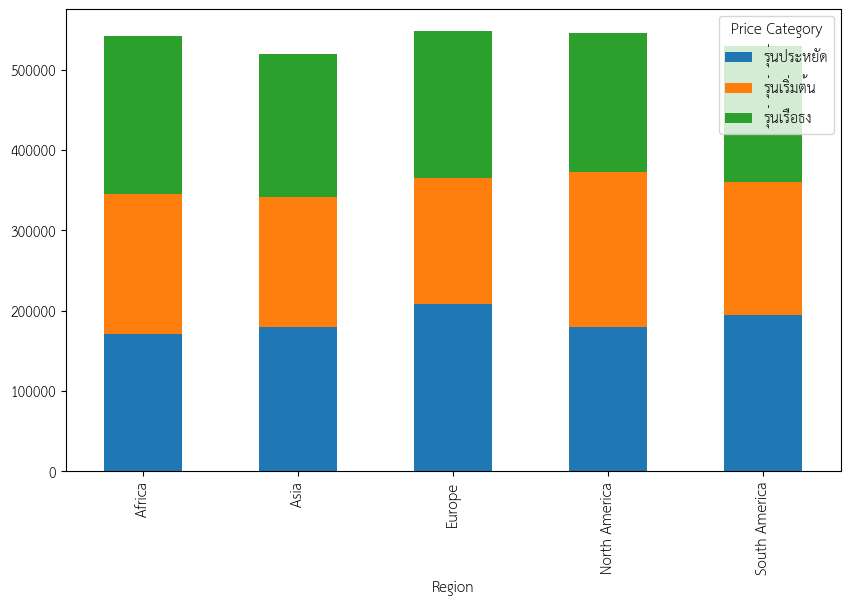

In [ ]:
# prompt: Plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price category

# Group data by Region and Price Category, then sum the Sales
region_price_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum()

# Unstack the data to create a DataFrame suitable for stacked bar chart
region_price_sales = region_price_sales.unstack()

# Create the stacked bar chart
region_price_sales.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()


## plot stacked barchart ด้วย mathplotlib

In [ ]:
region_brands_sales = data.groupby(['Region', 'Brand'])['Sales'].sum().unstack()
region_brands_sales

Brand,BrandA,BrandB,BrandC,BrandD
Region,,,,
Africa,132019,140187,132273,137077
Asia,136205,124678,139677,119048
Europe,135638,135069,131700,145661
North America,124810,153135,140802,126816
South America,144169,138543,115774,130760


## Plot ส่วนแรก

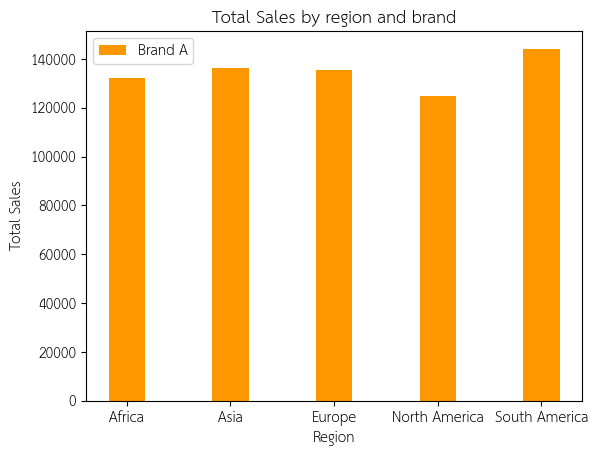

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brands_sales.index, region_brands_sales['BrandA'].values, width, label='Brand A',color = '#fc9700')
#ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('Total Sales')
ax.set_xlabel('Region')
ax.set_title('Total Sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 2

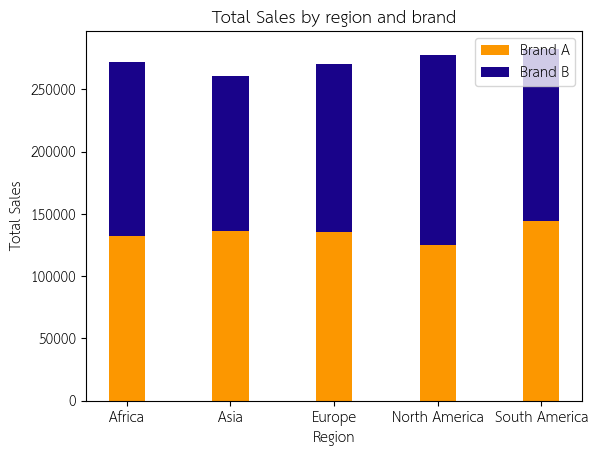

In [ ]:
 import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brands_sales.index, region_brands_sales['BrandA'].values, width, label='Brand A',color = '#fc9700')
ax.bar(region_brands_sales.index, region_brands_sales['BrandB'].values, width, bottom=region_brands_sales['BrandA'].values, label='Brand B',color = '#19038a')

ax.set_ylabel('Total Sales')
ax.set_xlabel('Region')
ax.set_title('Total Sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 3

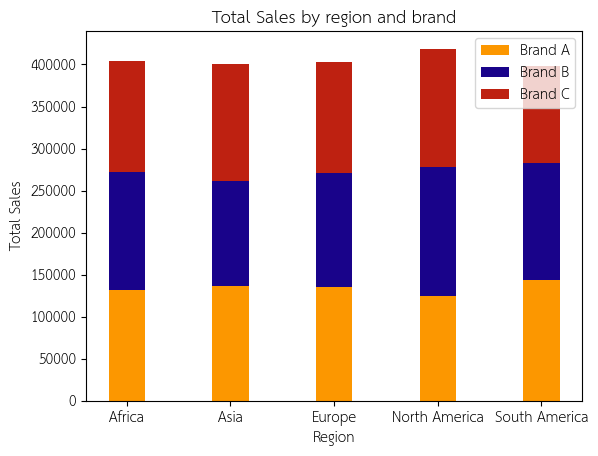

In [ ]:
 import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brands_sales.index, region_brands_sales['BrandA'].values, width, label='Brand A',color = '#fc9700')
ax.bar(region_brands_sales.index, region_brands_sales['BrandB'].values, width, bottom=region_brands_sales['BrandA'].values, label='Brand B',color = '#19038a')
ax.bar(region_brands_sales.index, region_brands_sales['BrandC'].values, width, bottom=region_brands_sales['BrandA'].values+region_brands_sales['BrandB'].values,label = 'Brand C' , color = '#be2111')

ax.set_ylabel('Total Sales')
ax.set_xlabel('Region')
ax.set_title('Total Sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 4

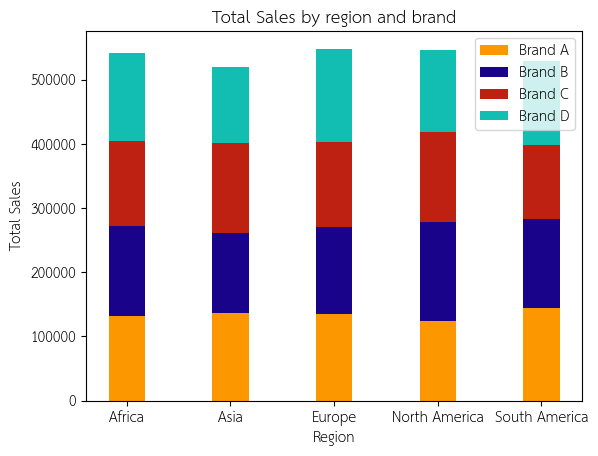

In [ ]:
 import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brands_sales.index, region_brands_sales['BrandA'].values, width, label='Brand A',color = '#fc9700')
ax.bar(region_brands_sales.index, region_brands_sales['BrandB'].values, width, bottom=region_brands_sales['BrandA'].values, label='Brand B',color = '#19038a')
ax.bar(region_brands_sales.index, region_brands_sales['BrandC'].values, width, bottom=region_brands_sales['BrandA'].values+region_brands_sales['BrandB'].values,label = 'Brand C' , color = '#be2111')
ax.bar(region_brands_sales.index, region_brands_sales['BrandD'].values, width, bottom=region_brands_sales['BrandA'].values+region_brands_sales['BrandB'].values+region_brands_sales['BrandC'].values,label = 'Brand D',color ='#11beb1')

ax.set_ylabel('Total Sales')
ax.set_xlabel('Region')
ax.set_title('Total Sales by region and brand')
ax.legend()

plt.show()

# Grouped bar chart (เปรียบเทียบในกลุ่ม)

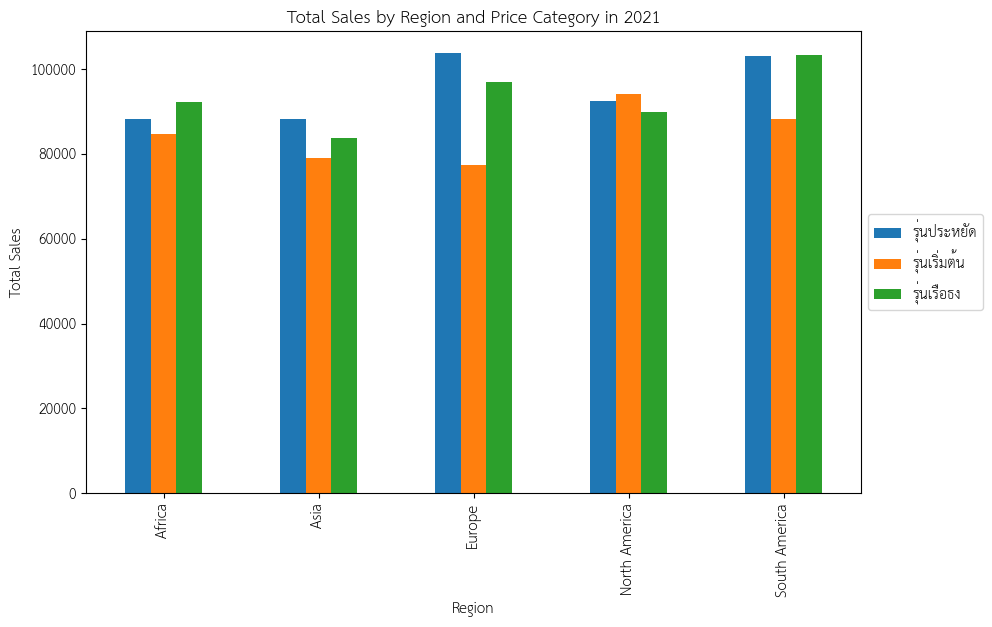

In [ ]:
# prompt: plot group bar chart ของแต่ละ region ในปี 2021 เพื่อเปรียบเทียบ Sales ของแต่ละ price category ย้าย legend ออกไปนอกกราฟ

# Group data by Region, Price Category, and sum the Sales
region_price_sales_2021 = data[data['Year'] == 2021].groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the grouped bar chart
region_price_sales_2021.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category in 2021')

# Move the legend outside the graph
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Display the chart
plt.show()


## Plot group bar chart ของหนังอินเดีย โดยแยกกลุ่มตามประเภทหนัง และ เปรียบเทียบ rating จาก ความยาวของหนัง

In [ ]:
data_india = pd.read_csv(os.path.join(path,'IMDb Movies India.csv'), encoding='latin-1')
data_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
data_india = data_india.dropna(subset = ('Rating','Genre','Duration'))
data_india = data_india[['Rating','Genre','Duration']]
data_india.head()

,Rating,Genre,Duration
1,7.0,Drama,109 min
3,4.4,"Comedy, Romance",110 min
5,4.7,"Comedy, Drama, Musical",147 min
6,7.4,"Drama, Romance, War",142 min
8,5.6,"Horror, Mystery, Thriller",82 min


In [ ]:
# prompt: ตัดคำว่า min ออกจาก คอลัมน์ duration

data_india['Duration'] = data_india['Duration'].str.replace(' min', '')


In [ ]:
# prompt: แยกตารางออกเป็นตารางย่อย 5 ตารางสำหรับ genre drama, action, romance, horror, musical

# Create a dictionary to store the dataframes for each genre
genre_tables = {}

# Define the genres to extract
genres = ['Drama', 'Action', 'Romance', 'Horror', 'Musical']

# Iterate over the genres and create separate dataframes
for genre in genres:
  genre_tables[genre] = data_india[data_india['Genre'] == genre].copy()

In [ ]:
all_tables = pd.concat(genre_tables.values())
all_tables

,Rating,Genre,Duration
1,7.0,Drama,109
10,6.2,Drama,96
30,7.1,Drama,116
32,5.6,Drama,168
36,4.5,Drama,94
...,...,...,...
7422,5.1,Musical,127
7770,4.6,Musical,119
10989,6.7,Musical,125
13934,5.9,Musical,103


In [ ]:
all_tables['Duration'] = pd.to_numeric(all_tables['Duration'])


In [ ]:
# prompt: แบ่ง duration ออกเป็น short , medium ,  long  โดย short สั้นกว่า 60 , medium 60- 90 ที่เหลือเป็น long

# Define a function to categorize duration
def categorize_duration(duration):
  if duration < 60:
    return 'short'
  elif 60 <= duration <= 90:
    return 'medium'
  else:
    return 'long'

# Apply the function to create a new column 'Duration Category'
all_tables['Duration Category'] = all_tables['Duration'].apply(categorize_duration)


In [ ]:
india_bar_data = all_tables.groupby(['Duration Category','Genre'])['Rating'].mean().unstack()
india_bar_data

Genre,Action,Drama,Horror,Musical,Romance
Duration Category,,,,,
long,5.086228,6.404376,4.622222,5.122222,5.52377
medium,4.966667,6.582759,4.927273,NaN,5.70000
short,4.500000,6.166667,4.500000,NaN,6.30000


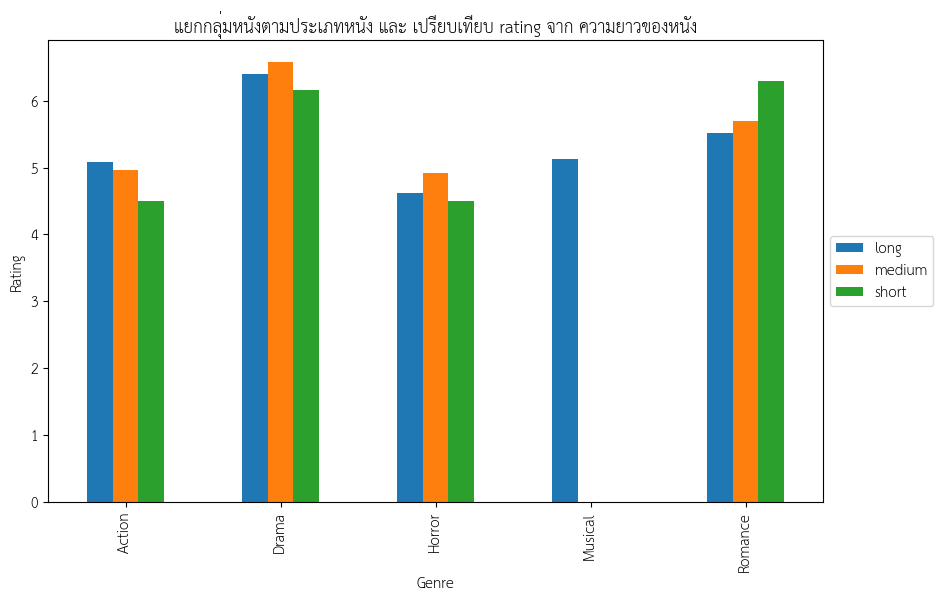

In [ ]:
# prompt: plot group bar chart ของแต่ละ region ในปี 2021 เพื่อเปรียบเทียบ Sales ของแต่ละ price category ย้าย legend ออกไปนอกกราฟ

# Group data by Region, Price Category, and sum the Sales
india_bar = all_tables.groupby(['Genre','Duration Category'])['Rating'].mean().unstack()

# Create the grouped bar chart
india_bar.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('แยกกลุ่มหนังตามประเภทหนัง และ เปรียบเทียบ rating จาก ความยาวของหนัง')

# Move the legend outside the graph
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Display the chart
plt.show()


#  วาด Stacked หรือ Grouped Bar Chart ของข้อมูลหนัง india แล้วนำมา Present วันพุธที่ 11 กันยายน 2567

In [ ]:
movie_india = pd.read_csv(os.path.join(path,'IMDb Movies India.csv'), encoding='latin-1')
movie_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
movie_india['Year'] = movie_india['Year'].str.replace('(', '').str.replace(')', '')
movie_india['Duration'] = movie_india['Duration'].str.replace('min', '')
movie_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
def split_genres(row):
  # Check if the genre value is a string before splitting
  if isinstance(row['Genre'], str):
    genres = row['Genre'].split(',')
    return [genre.strip() for genre in genres]
  else:
    # Handle cases where the genre is not a string (e.g., return an empty list or NaN)
    return []

movie_india['Genre'] = movie_india.apply(split_genres, axis=1)

In [ ]:
movie_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,[Drama],NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,[Drama],7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"[Drama, Musical]",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"[Comedy, Romance]",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,[Drama],NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,NaN,[Action],4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,"[Action, Drama]",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005,NaN,[Action],NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988,NaN,[Action],NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
import os

# Function to split genres and create new rows
def split_genres(row):
  if isinstance(row['Genre'], list):
    new_rows = []
    for i in range(len(row['Genre'])):
      new_row = row.copy()
      new_row['Genre'] = row['Genre'][i]
      new_rows.append(new_row)
    return new_rows
  else:
    return [row]

# Apply the function to split genres and create new rows
new_md = pd.concat([pd.DataFrame(split_genres(row)) for _, row in movie_india.iterrows()], ignore_index=True)

In [ ]:
new_md.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,Drama,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Homecoming,2021,90,Musical,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
4,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [ ]:
new_md = new_md.dropna(subset=['Rating','Year'])

In [ ]:
new_md['Genre'].value_counts()

,count
Genre,
Drama,4924
Action,2358
Romance,1781
Comedy,1609
Crime,1111
Thriller,876
Family,663
Musical,498
Adventure,386


In [ ]:
# Filter the DataFrame to include only the specified genres
selected_genres = ['Drama', 'Action', 'Romance', 'Comedy', 'Crime']
filtered_data = new_md[new_md['Genre'].isin(selected_genres)]


In [ ]:
filtered_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
4,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
7,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
23066,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
23067,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
23068,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
23071,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
filtered_data['Year'].value_counts().sort_index()

,count
Year,
1917,1
1931,3
1932,2
1933,4
1934,1
...,...
2017,276
2018,286
2019,328


In [ ]:
# Define a function to categorize years
def categorize_year(year):
  if 1917 <= year <= 1951:
    return '1917 - 1951'
  elif 1952 <= year <= 1986:
    return '1952 - 1986'
  else:
    return '1987 - 2021'

# Apply the function to create a new column 'Year Category'
filtered_data['Year Category'] = pd.to_numeric(filtered_data['Year']).apply(categorize_year)


<ipython-input-36-6772a44df8f9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year Category'] = pd.to_numeric(filtered_data['Year']).apply(categorize_year)


In [ ]:
filtered_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Year Category
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,1987 - 2021
4,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,1987 - 2021
5,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,1987 - 2021
7,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1987 - 2021
8,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1987 - 2021
...,...,...,...,...,...,...,...,...,...,...,...
23066,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,1987 - 2021
23067,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,1987 - 2021
23068,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,1987 - 2021
23071,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,1987 - 2021


In [ ]:
group_data = filtered_data.groupby(['Genre','Year Category'])['Genre'].count().unstack()
group_data

Year Category,1917 - 1951,1952 - 1986,1987 - 2021
Genre,,,
Action,10,702,1646
Comedy,12,396,1201
Crime,5,292,814
Drama,171,1654,3099
Romance,61,650,1070


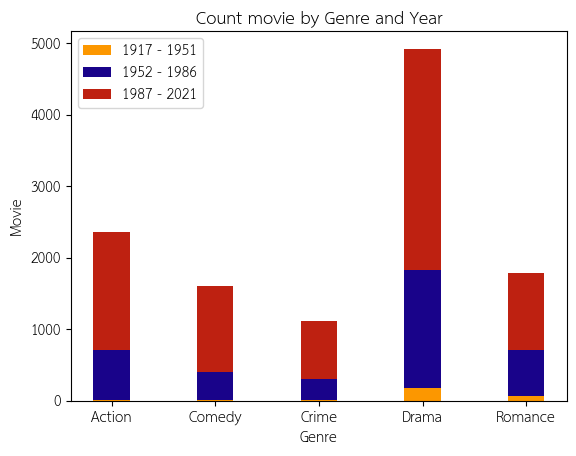

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(group_data.index, group_data['1917 - 1951'].values, width, label='1917 - 1951',color = '#fc9700')
ax.bar(group_data.index, group_data['1952 - 1986'].values, width, bottom=group_data['1917 - 1951'].values, label = '1952 - 1986',color = '#19038a')
ax.bar(group_data.index, group_data['1987 - 2021'].values, width, bottom=group_data['1917 - 1951'].values+group_data['1952 - 1986'].values,label = '1987 - 2021',color = '#be2111')
ax.set_ylabel('Movie')
ax.set_xlabel('Genre')
ax.set_title('Count movie by Genre and Year')
ax.legend()

plt.show()


In [ ]:
# Define a function to categorize duration
def categorize_duration(duration):
  if duration < 90:
    return 'short'
  elif 90 <= duration <= 150:
    return 'medium'
  else:
    return 'high'

# Apply the function to create a new column 'Duration Category'
filtered_data['Duration Category'] = pd.to_numeric(filtered_data['Duration']).apply(categorize_duration)


<ipython-input-40-30edf7954c59>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Duration Category'] = pd.to_numeric(filtered_data['Duration']).apply(categorize_duration)


In [ ]:
group = filtered_data.groupby(['Year Category','Duration Category'])['Duration Category'].count().unstack()
group

Duration Category,high,medium,short
Year Category,,,
1917 - 1951,140,114,5
1952 - 1986,2020,1667,7
1987 - 2021,3031,4555,244


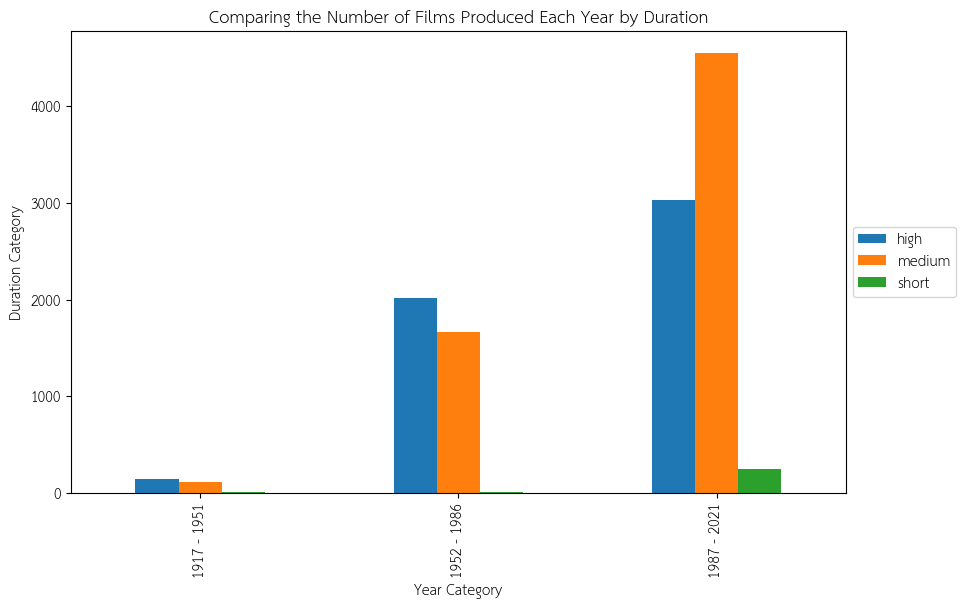

In [ ]:
# Create the grouped bar chart
group.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.ylabel('Duration Category')
plt.xlabel('Year Category')
plt.title('Comparing the Number of Films Produced Each Year by Duration')

# Move the legend outside the graph
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Display the chart
plt.show()

In [ ]:
# prompt: แบ่ง rating เป็น 0 - 4 , 5-7 , 8-10

# Define a function to categorize ratings
def categorize_rating(rating):
  if 0 <= rating < 5:
    return '0 - 4'
  elif 5 <= rating < 8:
    return '5 - 7'
  else:
    return '8 - 10'

# Apply the function to create a new column 'Rating Category'
filtered_data['Rating Category'] = filtered_data['Rating'].apply(categorize_rating)


<ipython-input-43-953d4d83aa76>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Rating Category'] = filtered_data['Rating'].apply(categorize_rating)


In [ ]:
group_2 = filtered_data.groupby(['Genre','Rating Category'])['Rating Category'].count().unstack()
group_2

Rating Category,0 - 4,5 - 7,8 - 10
Genre,,,
Action,840,1470,48
Comedy,460,1096,53
Crime,310,758,43
Drama,1059,3640,225
Romance,497,1243,41


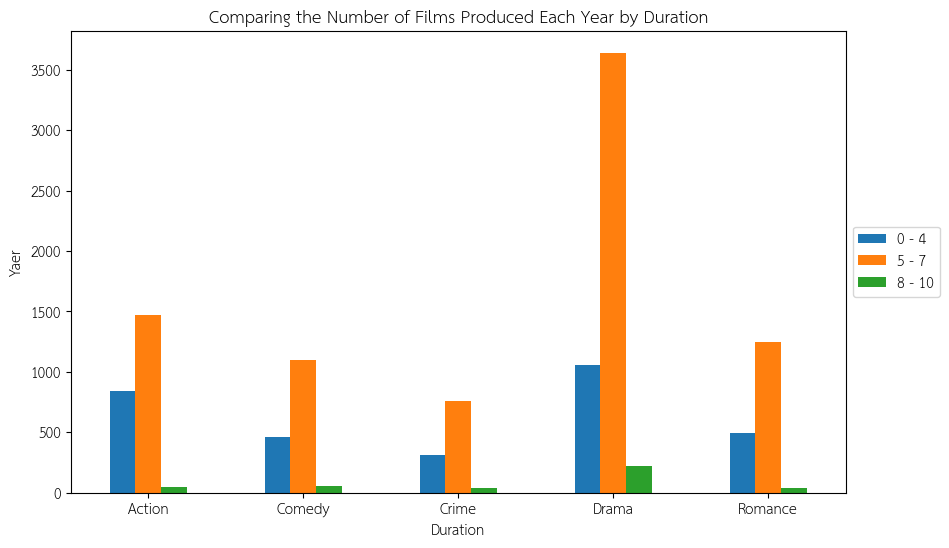

In [ ]:
# Create the grouped bar chart
group_2.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.ylabel('Yaer')
plt.xlabel('Duration')
plt.title('Comparing the Number of Films Produced Each Year by Duration')

# Move the legend outside the graph
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=0)
plt.yticks(rotation=0)
# Display the chart
plt.show()

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน');

KeyError: 'search_timestamp'

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')

## Grouped bar chart

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

แสดงปริมาณคนเข้าเว๊ปในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11:00-12:00 กับ 23:00-24:00

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)
& (data['search_timestamp'].dt.time < time(hour=12))
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]  # monday 11:00-12:00

In [ ]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [ ]:
b4lunch

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]

In [ ]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

In [ ]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [ ]:
import numpy as np

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#fc9700')
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

## Stacked bar chart

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

In [ ]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.barh(labels, b4midnight, width, left=b4lunch, label='before midnight',color = '#19038a')

ax.set_xlabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

## [เช็คชื่อ] โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย

## Histogram

## กราฟแสดงความถี่ของข้อมูล

ตัวอย่างข้อมูลที่ random มาจาก normal distribution ที่มี mean = 100  และ stdev = 15

(array([  2.,   2.,   2.,   4.,   9.,  14.,  17.,  39.,  47.,  59.,  90.,
        144., 159., 202., 288., 325., 388., 430., 507., 537., 604., 642.,
        650., 615., 590., 546., 534., 507., 429., 357., 323., 233., 196.,
        171., 113.,  73.,  51.,  36.,  26.,  22.,   5.,   3.,   2.,   2.,
          2.,   0.,   2.,   0.,   0.,   1.]),
 array([ 44.90650513,  47.32901741,  49.7515297 ,  52.17404198,
         54.59655427,  57.01906656,  59.44157884,  61.86409113,
         64.28660341,  66.7091157 ,  69.13162798,  71.55414027,
         73.97665256,  76.39916484,  78.82167713,  81.24418941,
         83.6667017 ,  86.08921398,  88.51172627,  90.93423856,
         93.35675084,  95.77926313,  98.20177541, 100.6242877 ,
        103.04679998, 105.46931227, 107.89182456, 110.31433684,
        112.73684913, 115.15936141, 117.5818737 , 120.00438598,
        122.42689827, 124.84941056, 127.27192284, 129.69443513,
        132.11694741, 134.5394597 , 136.96197198, 139.38448427,
        141.806996

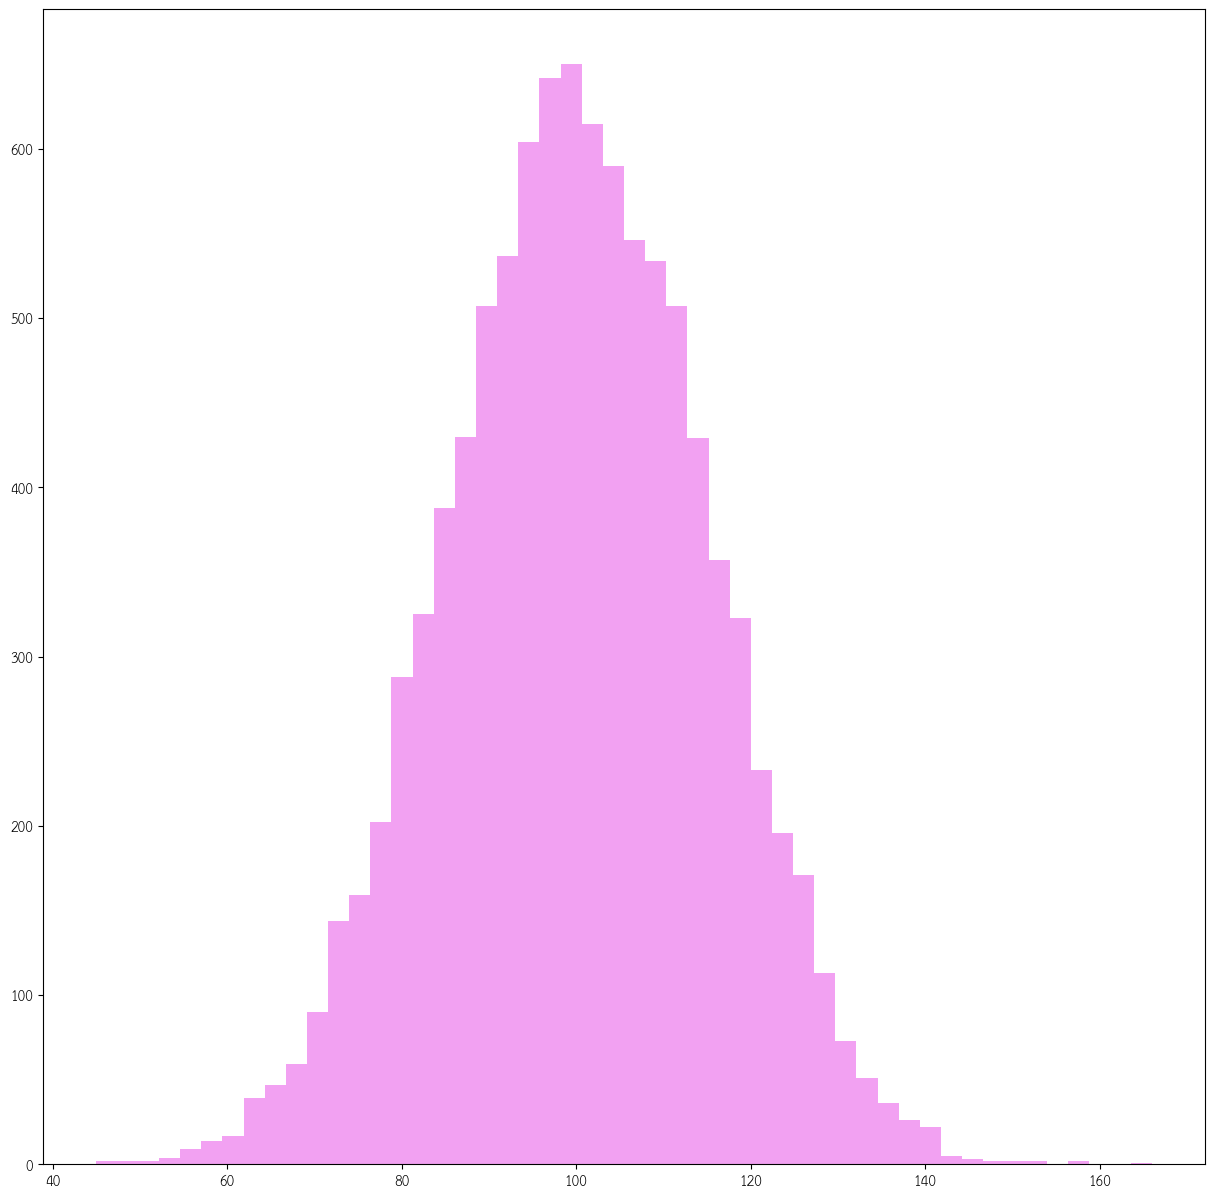

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(2024)

mu, sigma = 100, 15
X = mu + sigma * np.random.randn(10000)

plt.hist(X, 50, facecolor = 'violet', alpha = 0.75)

## ทดสอบกับข้อมูลหนังอินเดีย

In [ ]:
data_india = pd.read_csv(os.path.join(path,'IMDb Movies India.csv'), encoding='latin-1')
data_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
len(set(data_india.dropna(subset=['Genre'])['Genre']))

485

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

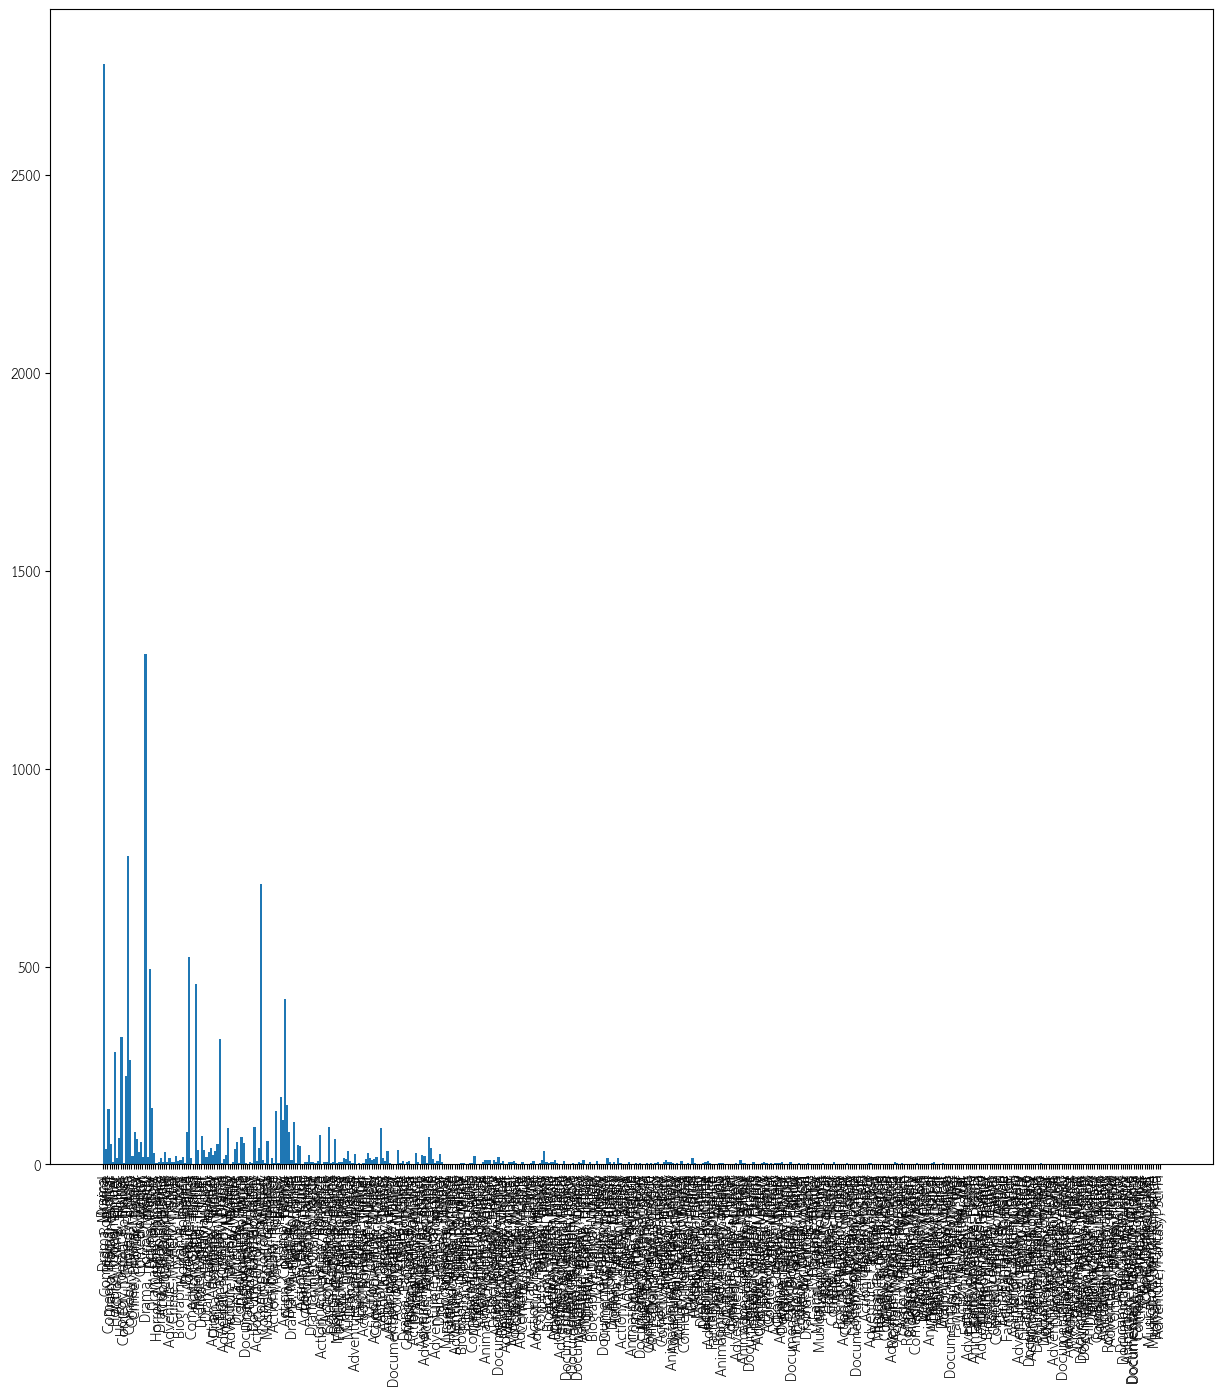

In [ ]:
plt.hist(data_india.dropna(subset=['Genre'])['Genre'],bins =len(set(data_india.dropna(subset=['Genre'])['Genre'])))
plt.xticks(rotation=90)

In [ ]:
# prompt: split value in column genre by ',' and make more column for each of those

# Assuming 'data' is your DataFrame and 'Genre' is the column with comma-separated values
# Create a new DataFrame with the split genres as separate columns
new_df = data_india['Genre'].str.split(',', expand=True)

# Rename the columns if needed
new_df.columns = ['Genre1', 'Genre2', 'Genre3']

# Concatenate the new columns with the original DataFrame
data_india2 = pd.concat([data_india, new_df], axis=1)

data_india2.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,None,None
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,Musical,None
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,None,None


In [ ]:
data_india2 = data_india2.dropna(subset=['Genre'])

In [ ]:
allGenre = list(data_india2['Genre1'])+list(data_india2['Genre2'])+list(data_india2['Genre3'])

In [ ]:
len(set(allGenre))

44

In [ ]:
allGenre

['Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Comedy',
 'Drama',
 'Documentary',
 'Horror',
 'Action',
 'Drama',
 'Horror',
 'Horror',
 'Comedy',
 'Thriller',
 'Comedy',
 'Comedy',
 'Comedy',
 'Comedy',
 'Crime',
 'Horror',
 'Biography',
 'Documentary',
 'Comedy',
 'Action',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Action',
 'Action',
 'Drama',
 'Drama',
 'Drama',
 'Horror',
 'Horror',
 'Drama',
 'Horror',
 'Action',
 'Action',
 'Thriller',
 'Comedy',
 'Drama',
 'Comedy',
 'Drama',
 'Comedy',
 'Adventure',
 'Action',
 'Drama',
 'Comedy',
 'Action',
 'Crime',
 'Drama',
 'Drama',
 'Comedy',
 'War',
 'Thriller',
 'Drama',
 'Sport',
 'Biography',
 'Thriller',
 'Drama',
 'Drama',
 'Drama',
 'Horror',
 'Comedy',
 'Comedy',
 'Crime',
 'Comedy',
 'Comedy',
 'Drama',
 'Comedy',
 'Drama',
 'Adventure',
 'Horror',
 'Thriller',
 'Action',
 'Thriller',
 'Comedy',
 'Drama',
 'Action',
 'Crime',
 'Drama',
 'Horror',
 'Horror',
 'Horror',
 'Horror',
 'Crime',
 'Drama',
 'Drama',
 'D

In [ ]:
# prompt: delete all none from the allGenre list

allGenre_cleaned = [x for x in allGenre if x is not None]


In [ ]:
# prompt: ลบช่องว่างที่อยู่หน้า string ถ้ามี

allGenre_cleaned = [x.strip() for x in allGenre_cleaned]


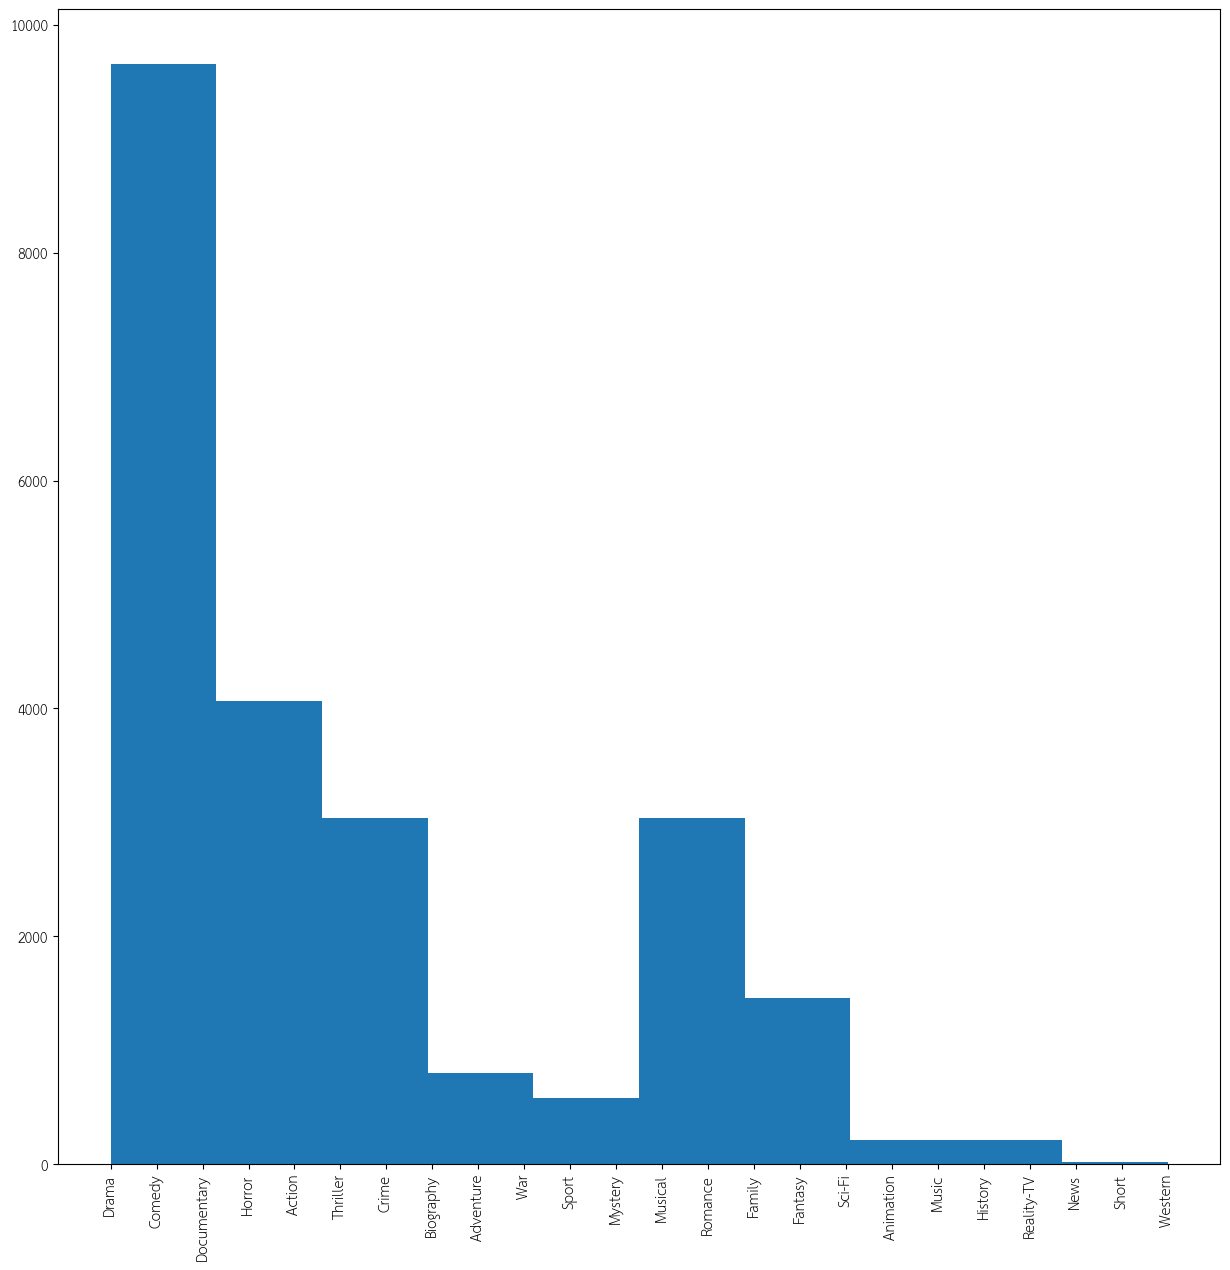

In [ ]:
plt.hist(allGenre_cleaned)
plt.xticks(rotation=90);

# Quiz15 หาพระเอก-นางเอก ที่มักจะแสดงคู่กัน ด้วย Histogram (พระเอก Actor1,นางเอก Actor 2 )

In [ ]:
data_india = data_india.dropna(subset = ['Actor 1','Actor 2'])

In [ ]:
# prompt: นำ Actor 1 และ Actor 2 มา + กัน

# Assuming 'data_india' is your DataFrame and 'Actor 1' and 'Actor 2' are the columns
data_india['Actor Pair'] = data_india['Actor 1'].fillna('') + ' & ' + data_india['Actor 2'].fillna('')

# Now 'Actor Pair' column contains the combined actor names


In [ ]:
data_india['Actor Pair']

,Actor Pair
0,Manmauji & Birbal
1,Rasika Dugal & Vivek Ghamande
2,Sayani Gupta & Plabita Borthakur
3,Prateik & Ishita Raj
4,Rajat Kapoor & Rituparna Sengupta
...,...
15502,Ramesh Puri & Jalal Agha
15503,Chiranjeevi & Jayamalini
15504,Naseeruddin Shah & Sumeet Saigal
15505,Akshay Kumar & Twinkle Khanna


In [ ]:
data_india['Actor Pair'].value_counts()

,count
Actor Pair,
Jeetendra & Rekha,21
Dharmendra & Hema Malini,16
Jeetendra & Jaya Prada,15
Dara Singh & Mumtaz,11
Jeetendra & Hema Malini,10
...,...
Chander Sharma & Akashdeep,1
Ashraf Khan & Zebunissa,1
Feroze Dastur & Rabab,1


In [ ]:
actor_pair_counts = data_india['Actor Pair'].value_counts()
filtered_actor_pairs = actor_pair_counts[actor_pair_counts > 2]
filtered_actor_pairs


,count
Actor Pair,
Jeetendra & Rekha,21
Dharmendra & Hema Malini,16
Jeetendra & Jaya Prada,15
Dara Singh & Mumtaz,11
Jeetendra & Hema Malini,10
...,...
Prithviraj Kapoor & Dara Singh,3
Mohan Joshi & Shakti Kapoor,3
Rekha & Naseeruddin Shah,3


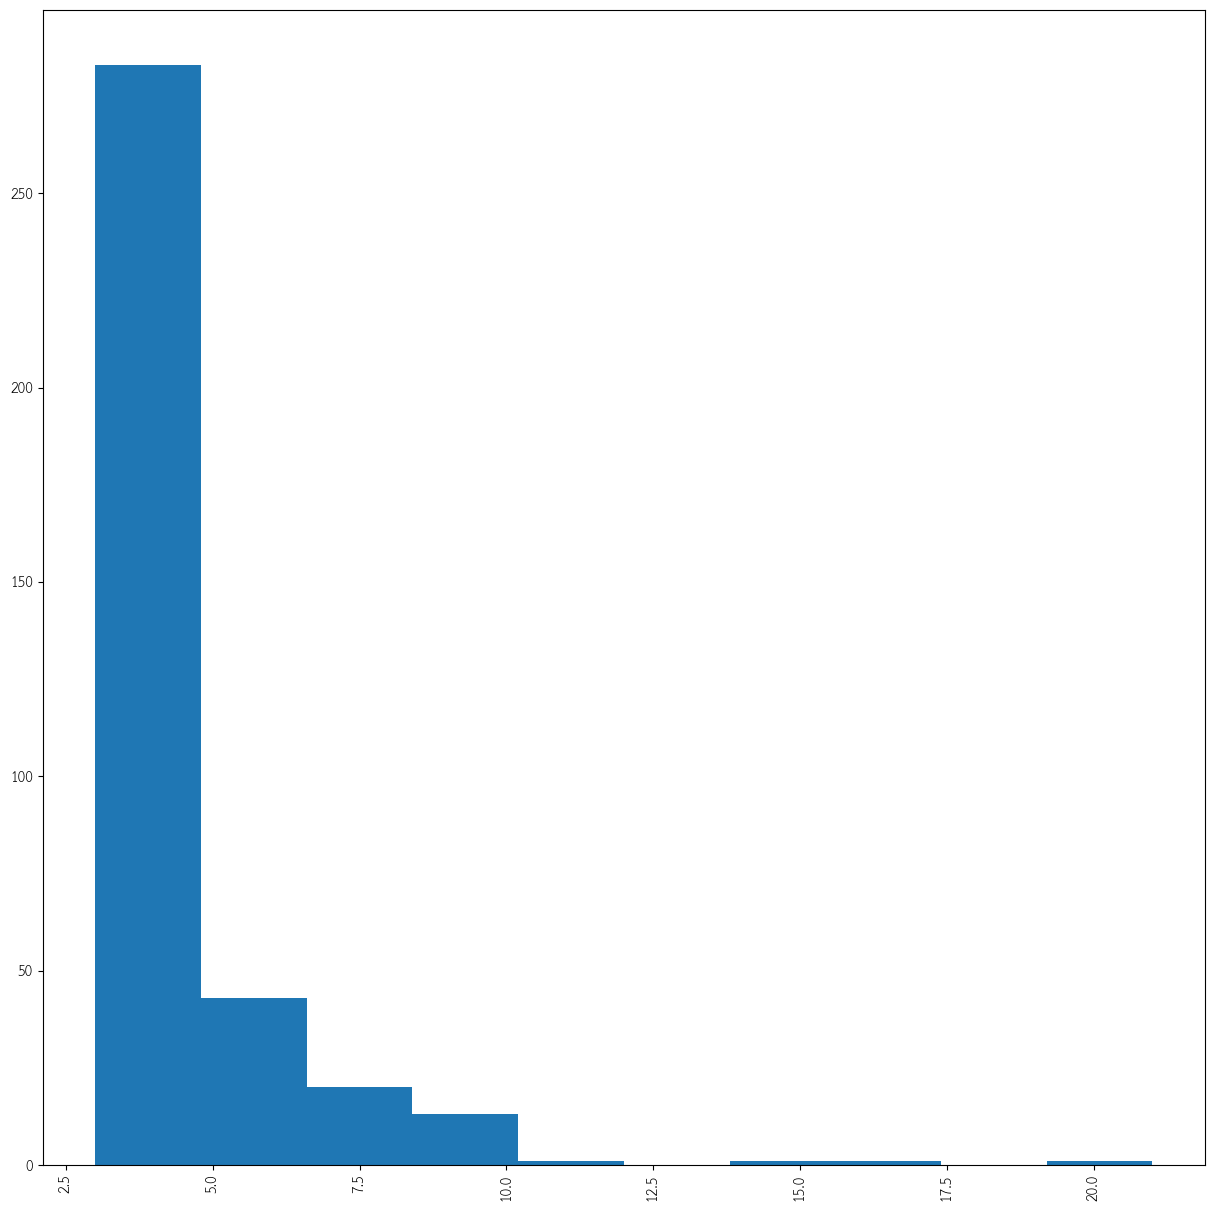

In [ ]:
plt.hist(filtered_actor_pairs)
plt.xticks(rotation=90);

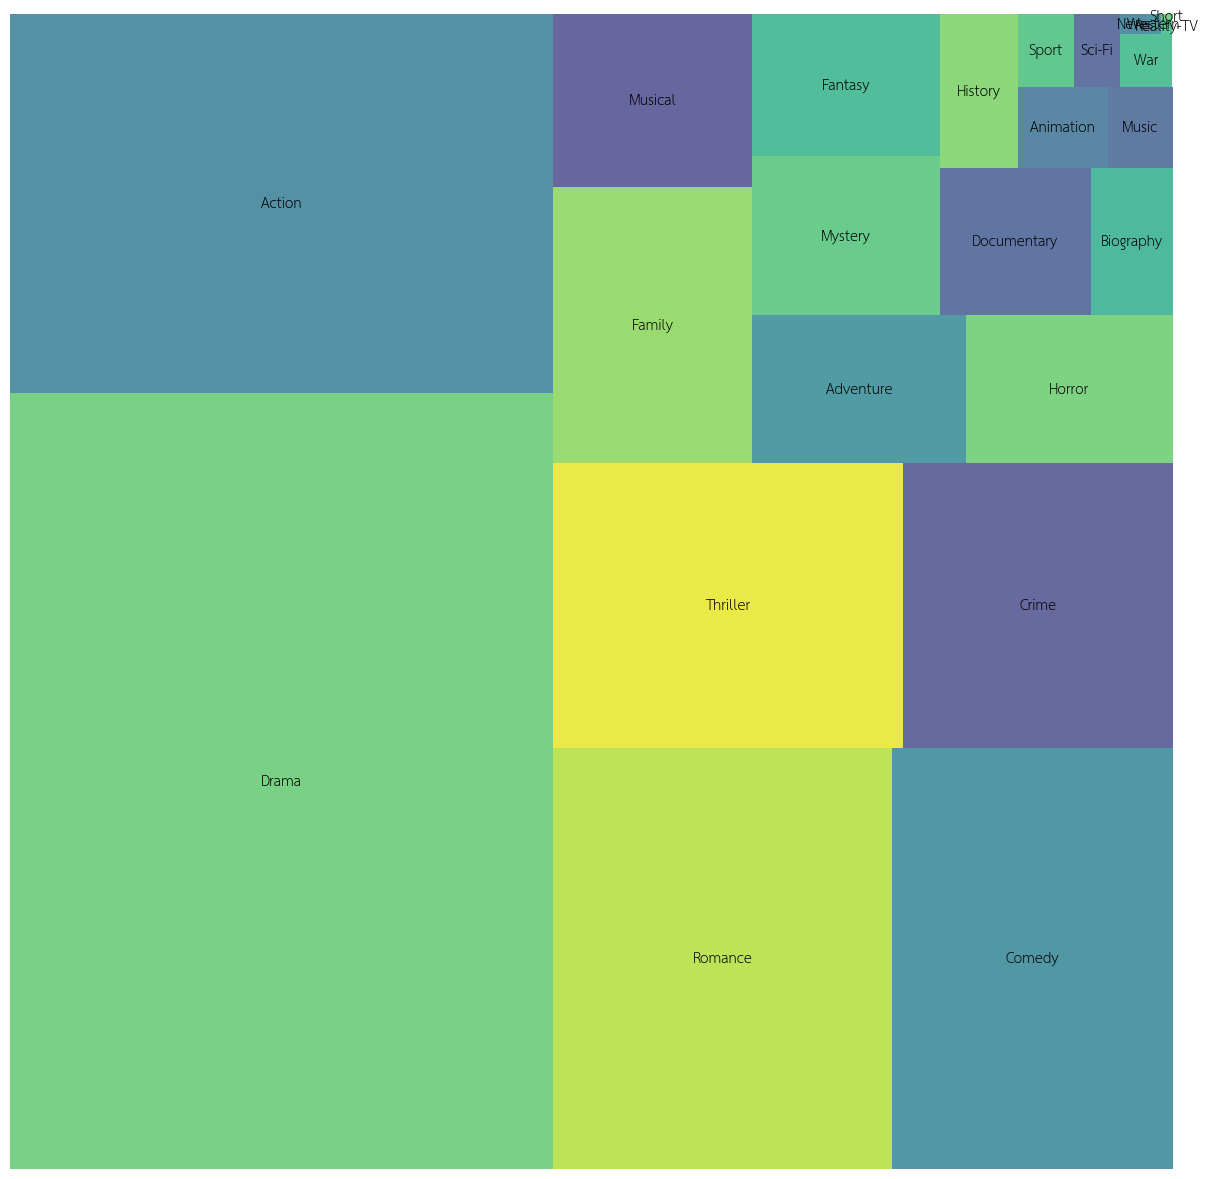

In [ ]:
# prompt: plot treemap of the genre

import squarify

# Assuming 'allGenre_cleaned' is your list of genres
genre_counts = pd.Series(allGenre_cleaned).value_counts()

# Create the treemap
squarify.plot(sizes=genre_counts.values, label=genre_counts.index, alpha=.8 )
plt.axis('off')
plt.show()


ตัวอย่างข้อมูล wongnai.com

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[15,15]
output = plt.hist(list(data['number_of_result']),10,facecolor = 'red' ,alpha = 0.75)

KeyError: 'number_of_result'

แก้ไข แกน x ที่เรียงข้อมูลผิด

In [ ]:
data.dtypes

เรียกดู data type ของ ตัวแปร

In [ ]:
type(data['number_of_result'][0])

ตรวจสอบ data type ของตัวแปร

In [ ]:
type(data['number_of_result'][0]) == int

ตรวจสอบดูทุกๆค่าใน column 'number_of_result'

In [ ]:
# for x in data['number_of_result']:
#     if type(x) != int:
#         print(f'{x} -> {type(x)}')


In [ ]:
new_type = data['number_of_result'].astype('int32')

ลบ record ที่มีค่า ใน column 'number_of_result' เป็น number of result

In [ ]:
data[data['number_of_result']=='number_of_result']

In [ ]:
data = data.drop(1000016)

In [ ]:
data[data['number_of_result']=='number_of_result']

In [ ]:
new_type = data['number_of_result'].astype('int32')

In [ ]:
output = plt.hist(new_type,100,facecolor = 'red' ,alpha = 0.75)

ลบ outlier

In [ ]:
new_type_nooutlier = new_type[new_type < 25]

In [ ]:
new_type.shape[0] - new_type_nooutlier.shape[0]

In [ ]:
matplotlib.rcParams['figure.figsize']=[8,8]
output = plt.hist(new_type_nooutlier,10,facecolor = 'red' ,alpha = 0.75)

Quiz 7 เปรียบเทียบความถี่ของแท่งที่มีค่ามากที่สุด กับ แท่งอื่นๆรวมกัน

In [ ]:
output

In [ ]:
output[0]

In [ ]:
output[0][-1]

In [ ]:
sum(output[0][:-1])

## Tree map

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import squarify

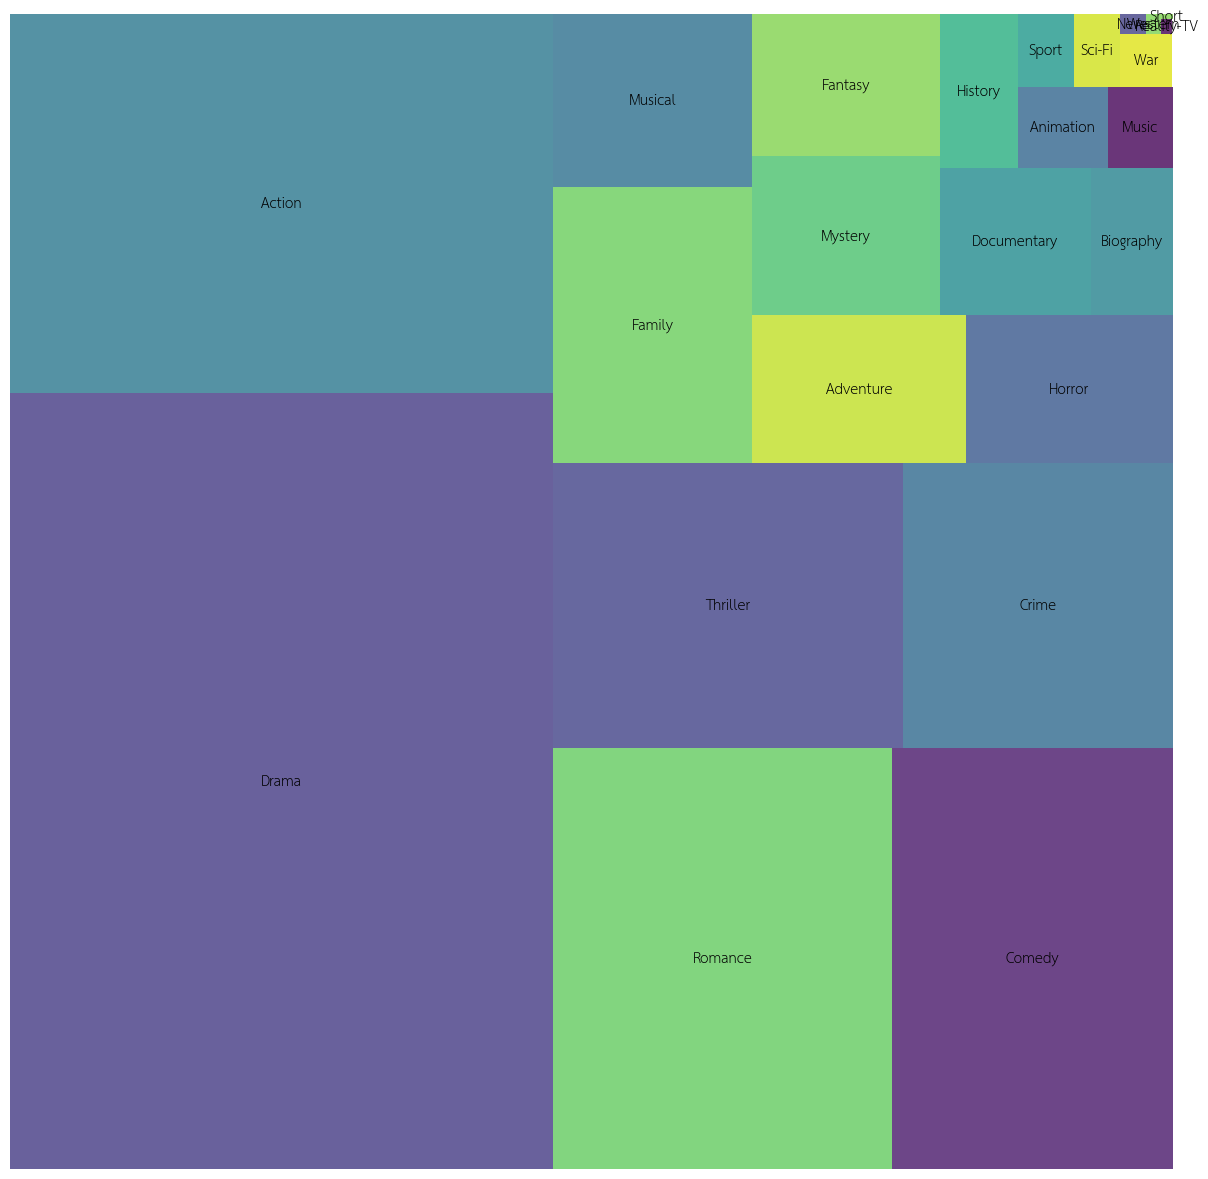

In [ ]:
# prompt: plot treemap of the genre

import squarify

# Assuming 'allGenre_cleaned' is your list of genres
genre_counts = pd.Series(allGenre_cleaned).value_counts()

# Create the treemap
squarify.plot(sizes=genre_counts.values, label=genre_counts.index, alpha=.8 )
plt.axis('off')
plt.show()


In [ ]:
squarify.plot(output[0])

NameError: name 'output' is not defined

In [ ]:
squarify.plot(output[0],value=output[0])

In [ ]:
squarify.plot(output[0],value=output[0],norm_y=60)

## Radar Chart

In [ ]:
import numpy as np
import pandas as pd  #import pandas มาเพราะข้อมูลจะเกี่ยวกับตาราง
import matplotlib.pyplot as plt
from math import pi #import math มาเนื่องจากเกี่ยวกับวงกลมนำมาใช้เพื่อดึงค่าพาย

In [ ]:
data = {'client_id' : ['c1' , 'c2' , 'c3' , 'c4'],
         'cheese' : [2,5,4,3],
         'beer' : [2,1,3,5],
         'chicken' : [5,3,3,4],
        'bread' : [4,3,2,1],
       'coffee' : [2,3,5,3]}
df = pd.DataFrame.from_dict(data)
df

,client_id,cheese,beer,chicken,bread,coffee
0,c1,2,2,5,4,2
1,c2,5,1,3,3,3
2,c3,4,3,3,2,5
3,c4,3,5,4,1,3


In [ ]:
categories = list(df.columns[1:])
categories

['cheese', 'beer', 'chicken', 'bread', 'coffee']

In [ ]:
categories = list(df.columns[1:]) #select all columns except 'client_id'

values = df[categories].mean().values.flatten().tolist() #calculate mean of numerical columns only
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

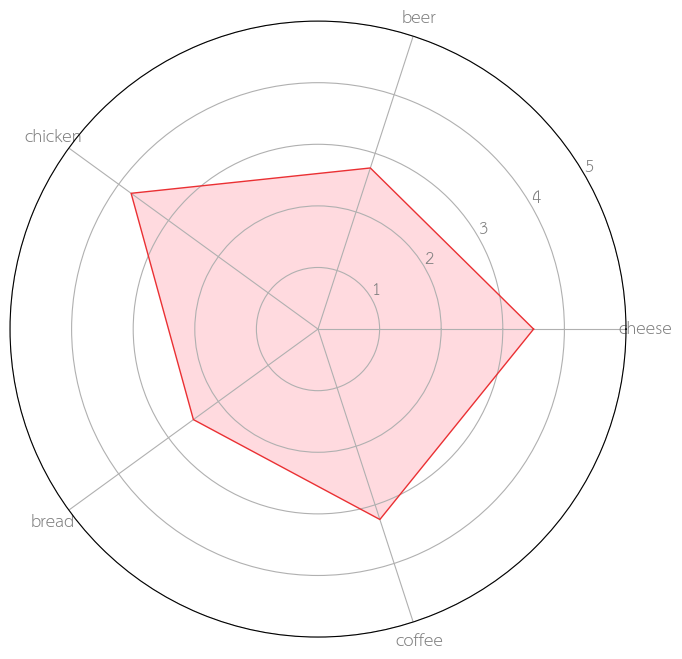

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

ax.plot(angles, values, linewidth=1, linestyle='solid' , color = '#ea3033') #เส้นกราฟ
ax.fill(angles, values, 'lightpink', alpha=0.5) #พื้นที่

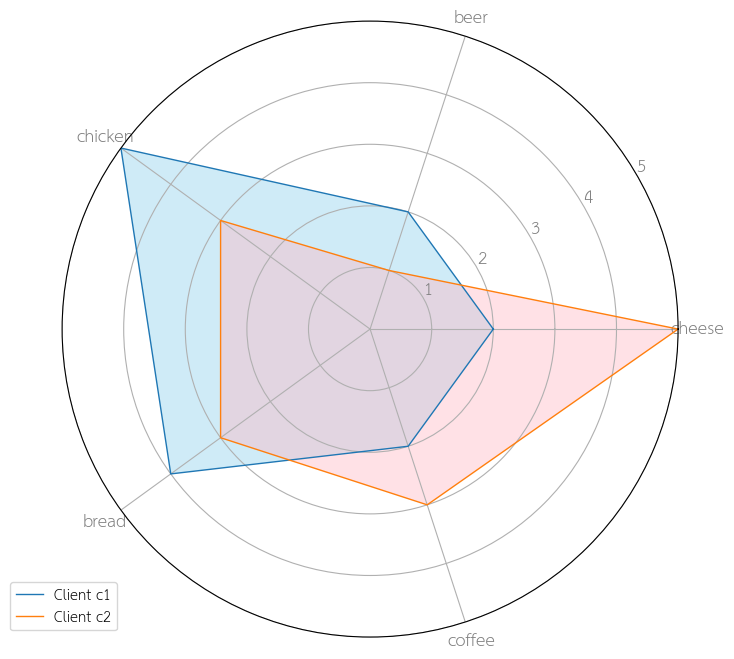

In [ ]:
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

# part 1
val_c1 = df.loc[0].drop('client_id').values.flatten().tolist()
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1,
        linestyle='solid', label='Client c1')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)

# part 2
val_c2=df.loc[1].drop('client_id').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1,
        linestyle='solid', label='Client c2')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# HW9 present radar chart data india

In [1]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Data_viz'

In [44]:
data_india = pd.read_csv(os.path.join(path,'IMDb Movies India.csv'), encoding='latin-1')
data_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [45]:
data_india['Duration'] = data_india['Duration'].str.replace(' min', '')

In [46]:
data_india['Year'] = data_india['Year'].str.replace('(', '')
data_india['Year'] = data_india['Year'].str.replace(')', '')

In [47]:
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
def split_genres(row):
  # Check if the genre value is a string before splitting
  if isinstance(row['Genre'], str):
    genres = row['Genre'].split(',')
    return [genre.strip() for genre in genres]
  else:
    # Handle cases where the genre is not a string (e.g., return an empty list or NaN)
    return []
data_india['Genre'] = data_india.apply(split_genres, axis=1)

In [49]:
# Function to split genres and create new rows
def split_genres(row):
  if isinstance(row['Genre'], list):
    new_rows = []
    for i in range(len(row['Genre'])):
      new_row = row.copy()
      new_row['Genre'] = row['Genre'][i]
      new_rows.append(new_row)
    return new_rows
  else:
    return [row]

# Apply the function to split genres and create new rows
new_md = pd.concat([pd.DataFrame(split_genres(row)) for _, row in data_india.iterrows()], ignore_index=True)

In [50]:
new_md

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,Drama,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Homecoming,2021,90,Musical,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
4,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
...,...,...,...,...,...,...,...,...,...,...
23068,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
23069,Zulmi Raj,2005,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
23070,Zulmi Shikari,1988,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
23071,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [40]:
new_md = new_md.dropna(subset=['Rating','Votes'])

In [53]:
# ตรวจสอบและแปลงคอลัมน์ Year เป็นชนิดข้อมูลที่ถูกต้อง
new_md['Year'] = pd.to_numeric(new_md['Year'], errors='coerce')  # แปลงเป็นตัวเลข หากไม่สามารถแปลงได้จะให้ค่า NaN

# ลบแถวที่มีค่าปีเป็น NaN (ไม่สามารถแปลงได้)
new_md = new_md.dropna(subset=['Year'])

# สร้างคอลัมน์ 'Era' ใน DataFrame
new_md['Era'] = new_md['Year'].apply(assign_era)

# ตรวจสอบข้อมูล
print(new_md[['Year', 'Era']].head())


     Year          Era
1  2019.0  ยุคสมัยใหม่
2  2021.0  ยุคสมัยใหม่
3  2021.0  ยุคสมัยใหม่
4  2019.0  ยุคสมัยใหม่
5  2019.0  ยุคสมัยใหม่


<ipython-input-53-e31d43691d0d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_md['Era'] = new_md['Year'].apply(assign_era)


<ipython-input-57-570613e703f2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_md['Era'] = new_md['Year'].apply(assign_era)


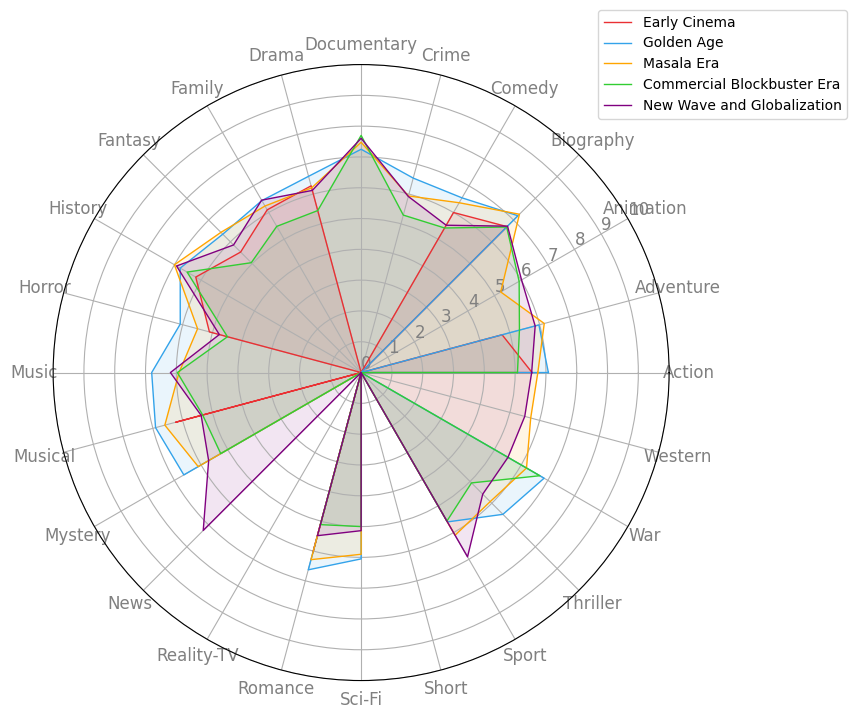

In [57]:
import math  # ใช้ในการคำนวณมุมของแกนกราฟ radar chart
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset 'new_md' has columns 'Release_Year', 'Genre', and 'Rating'

# สร้างฟังก์ชันในการแบ่งยุคภาพยนตร์
def assign_era(release_year):
    if release_year < 1940:
        return 'Early Cinema'
    elif 1940 <= release_year < 1970:
        return 'Golden Age'
    elif 1970 <= release_year < 1990:
        return 'Masala Era'
    elif 1990 <= release_year < 2010:
        return 'Commercial Blockbuster Era'
    else:
        return 'New Wave and Globalization'

# สร้างคอลัมน์ 'Era' ใน DataFrame
new_md['Era'] = new_md['Year'].apply(assign_era)

# คำนวณค่าเฉลี่ย Rating ของแต่ละ Genre ในแต่ละยุค
era_genre_rating = new_md.groupby(['Era', 'Genre'])['Rating'].mean().unstack()

era_genre_rating = era_genre_rating.fillna(0)  # หรือใช้วิธีที่เหมาะสม

# เลือก Genre ที่ต้องการสร้างกราฟ (คุณสามารถปรับตามที่ต้องการ)
selected_genres = era_genre_rating.columns.tolist()

# เตรียมข้อมูลสำหรับแต่ละยุค
eras = ['Early Cinema', 'Golden Age', 'Masala Era', 'Commercial Blockbuster Era', 'New Wave and Globalization']
values = []


for era in eras:
    # ดึงค่าเฉลี่ย Rating สำหรับแต่ละยุค
    era_values = era_genre_rating.loc[era, selected_genres].tolist()
    values.append(era_values)

# ปิดลูปของแต่ละค่าเพื่อสร้างกราฟ radar chart
values = [v + v[:1] for v in values]
angles = [n / float(len(selected_genres)) * 2 * math.pi for n in range(len(selected_genres))]
angles += angles[:1]

# สร้าง radar chart
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), subplot_kw=dict(polar=True))

# เพิ่มแกนและ grid
plt.xticks(angles[:-1], selected_genres, color='grey', size=12)
plt.yticks(np.arange(0, 11, 1), [str(i) for i in range(0, 11, 1)], color='grey', size=12)
plt.ylim(0, 10)
ax.set_rlabel_position(30)

# Plot ค่าเฉลี่ย Rating สำหรับแต่ละยุค
colors = ['#ea3033', '#33a3ea', '#ffa500', '#32cd32', '#800080']
for i, era in enumerate(eras):
    ax.plot(angles, values[i], linewidth=1, linestyle='solid', label=era, color=colors[i])
    ax.fill(angles, values[i], colors[i], alpha=0.1)

# เพิ่ม legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# แสดงกราฟ
plt.show()


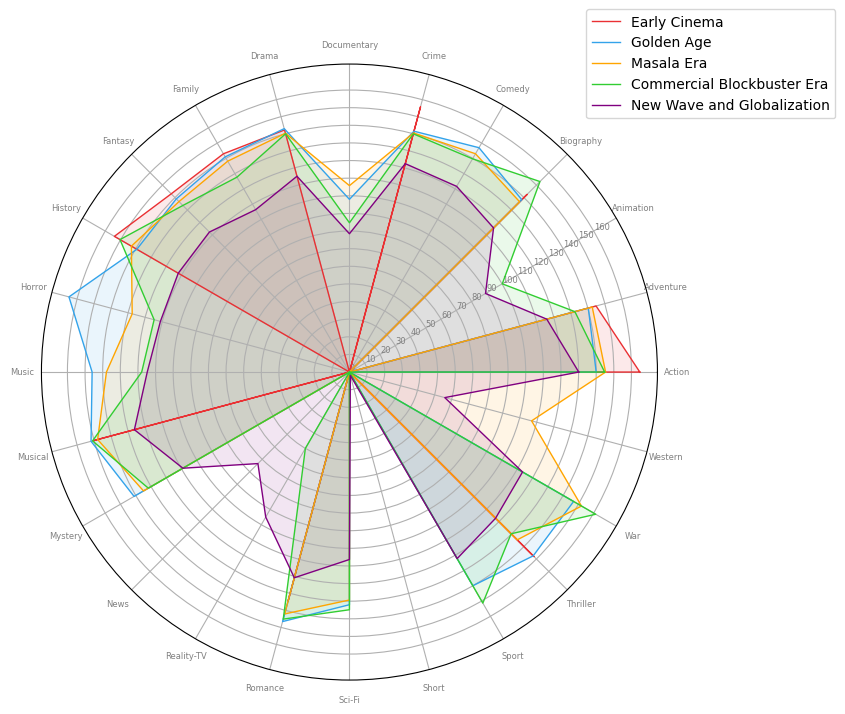

In [65]:
import math  # ใช้ในการคำนวณมุมของแกนกราฟ radar chart
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset 'new_md' has columns 'Release_Year', 'Genre', and 'Duration'

# สร้างฟังก์ชันในการแบ่งยุคภาพยนตร์
def assign_era(release_year):
    if release_year < 1940:
        return 'Early Cinema'
    elif 1940 <= release_year < 1970:
        return 'Golden Age'
    elif 1970 <= release_year < 1990:
        return 'Masala Era'
    elif 1990 <= release_year < 2010:
        return 'Commercial Blockbuster Era'
    else:
        return 'New Wave and Globalization'

# แปลงคอลัมน์ Duration ให้เป็นตัวเลข
new_md['Duration'] = pd.to_numeric(new_md['Duration'], errors='coerce')

# ลบแถวที่มีค่า NaN ในคอลัมน์ Duration
new_md = new_md.dropna(subset=['Duration'])

# สร้างคอลัมน์ 'Era' ใน DataFrame ด้วยการใช้ .loc เพื่อแก้ไขปัญหา SettingWithCopyWarning
new_md.loc[:, 'Era'] = new_md['Year'].apply(assign_era)

# คำนวณค่าเฉลี่ย Duration ของแต่ละ Genre ในแต่ละยุค
era_genre_duration = new_md.groupby(['Era', 'Genre'])['Duration'].mean().unstack()

era_genre_duration = era_genre_duration.fillna(0)  # หรือใช้วิธีที่เหมาะสม

# เลือก Genre ที่ต้องการสร้างกราฟ (คุณสามารถปรับตามที่ต้องการ)
selected_genres = era_genre_duration.columns.tolist()

# เตรียมข้อมูลสำหรับแต่ละยุค
eras = ['Early Cinema', 'Golden Age', 'Masala Era', 'Commercial Blockbuster Era', 'New Wave and Globalization']
values = []

for era in eras:
    # ดึงค่าเฉลี่ย Duration สำหรับแต่ละยุค
    era_values = era_genre_duration.loc[era, selected_genres].tolist()
    values.append(era_values)

# ปิดลูปของแต่ละค่าเพื่อสร้างกราฟ radar chart
values = [v + v[:1] for v in values]
angles = [n / float(len(selected_genres)) * 2 * math.pi for n in range(len(selected_genres))]
angles += angles[:1]

# สร้าง radar chart
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), subplot_kw=dict(polar=True))

# เพิ่มแกนและ grid
plt.xticks(angles[:-1], selected_genres, color='grey', size=6)
plt.yticks(np.arange(0, max(map(max, values)) + 1, 10), color='grey', size=6)  # ปรับค่า y ให้สัมพันธ์กับค่า Duration
plt.ylim(0, max(map(max, values)) + 10)  # ขยายช่วง y ตามค่า Duration
ax.set_rlabel_position(30)

# Plot ค่าเฉลี่ย Duration สำหรับแต่ละยุค
colors = ['#ea3033', '#33a3ea', '#ffa500', '#32cd32', '#800080']
for i, era in enumerate(eras):
    ax.plot(angles, values[i], linewidth=1, linestyle='solid', label=era, color=colors[i])
    ax.fill(angles, values[i], colors[i], alpha=0.1)

# เพิ่ม legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# แสดงกราฟ
plt.show()
